<a href="https://colab.research.google.com/github/pcpiscator/01T2021/blob/main/C%C3%B3pia_de_Furg_ECD_06a_Machine_Learning_I_%C3%81rvores_de_decis%C3%A3o(M).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Curso de Especialização em Ciência de Dados - FURG
## Machine Learning I - Árvores de decisão
### Prof. Marcelo Malheiros

Código adaptado de Aurélien Geron (licença Apache-2.0)

---

# Inicialização

Aqui importamos as bibliotecas fundamentais de Python para este _notebook_:

- NumPy: suporte a vetores, matrizes e operações de Álgebra Linear
- Matplotlib: biblioteca de visualização de dados
- Scikit-Learn: biblioteca com algoritmos de Machine Learning

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sklearn

Este notebook também utiliza a ferramenta Graphviz para visualizar as árvores de decisão. 

O pacote Graphviz já faz parte do ambiente Colaboratory.

**Atenção:** para quem utiliza o ambiente Jupyter, é preciso primeiro instalar os pacotes `graphviz` e `python-graphviz`. Na linha de comando isso pode ser feito assim:

    conda install graphviz python-graphviz

In [ ]:
import graphviz

# Classificação usando árvores de decisão

**Árvores de decisão** (_decision trees_) é um algoritmo clássico de Machine Learning.

Esta é uma técnica bastante versátil, podendo ser usada tanto para tarefas de classificação (que veremos a seguir) como de regressão (mais adiante neste _notebook_).

Como exemplo usaremos novamente o conjunto de dados IRIS, interno à biblioteca `Scikit-Learn`. É o mesmo _dataset_ sobre características de três espécies de flores.

In [ ]:
# importação dos dados

from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data[:, 2:] # comprimento e largura da pétala
y = iris.target

In [ ]:
# criação e treinamento do classificador

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42, max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

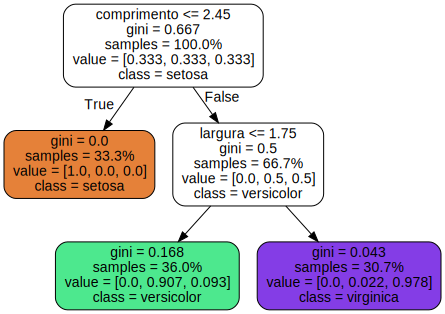

In [ ]:
# visualização da árvore de decisão

from sklearn.tree import export_graphviz

vis = export_graphviz(tree_clf, feature_names=['comprimento', 'largura'], class_names=iris.target_names,
                      rounded=True, filled=True, proportion=True)

# exibição da figura
graphviz.Source(vis)

Suponha que você encontre uma flor de íris e queira classificá-la. Você começa no nodo raiz (profundidade 0, no topo). Este nodo pergunta se o comprimento da pétala da flor é menor ou igual a 2,45 cm. Se for, então você desce para o filho esquerdo da raiz (profundidade 1). Neste caso, é um nodo sem filhos, por isso não se faz mais nenhuma pergunta: a classe prevista para esse nodo é _Iris setosa_.

Agora, suponha que você encontre outra flor, mas desta vez o comprimento da pétala é maior que 2,45 cm. Você deve descer até o filho direito da raiz (profundidade 1), que tem filhos. Então você faz outra pergunta: a largura da pétala é menor ou igual a 1,75 cm? Se for, então sua flor é provavelmente uma _Iris versicolor_ (profundidade 2, à esquerda). Se não, provavelmente é uma _Iris virginica_ (profundidade 2, à direita).

É interessante notar que o algoritmo de àrvores de decisão não depende de preprocessamento. Em particular, não é necessário o escalonamento dos atributos.

A medida **samples** indica o percentual de todas as instâncias que o nodo representa.

A medida **value** mostra as probabilidades de classificação para este nodo, em relação a todas as classes do problema.

A medida **gini** mede a **impureza** de um nodo. Um nodo é dito **puro** (gini = 0) se todas as instâncias de treinamento a que este nodo se aplica pertencem à mesma classe.

Não se preocupe com os detalhes do código abaixo, ele apenas mostra as fronteiras de decisão estabelecidas por esta árvore de decisão.

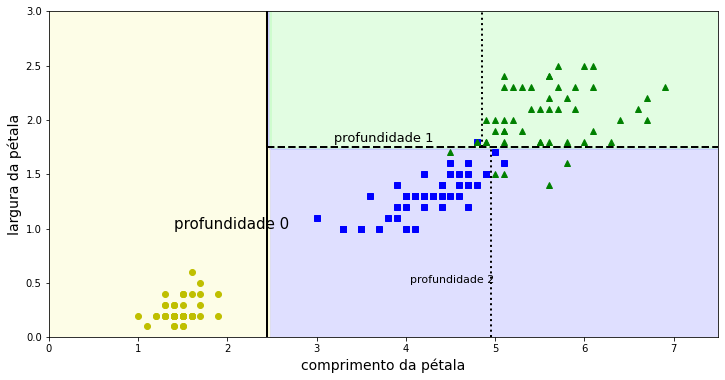

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    cmap1 = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap1)
    if not iris:
        cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'yo', label='Iris setosa')
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'bs', label='Iris versicolor')
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], 'g^', label='Iris virginica')
        plt.axis(axes)
    if iris:
        plt.xlabel('comprimento da pétala', fontsize=14)
        plt.ylabel('largura da pétala', fontsize=14)
    else:
        plt.xlabel(r'$x_1$', fontsize=18)
        plt.ylabel(r'$x_2$', fontsize=18, rotation=0)
    if legend:
        plt.legend(loc='lower right', fontsize=14)

plt.figure(figsize=(12, 6))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], 'k-', linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], 'k--', linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], 'k:', linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], 'k:', linewidth=2)
plt.text(1.40, 1.0, 'profundidade 0', fontsize=15)
plt.text(3.2, 1.80, 'profundidade 1', fontsize=13)
plt.text(4.05, 0.5, 'profundidade 2', fontsize=11)
plt.show()

# Predição de probabilidades e de classe

Aqui vamos definir uma única instância e obter tanto as probabilidades associadas a cada classe como a classe mais provável que ela seja.

In [ ]:
flor = [[5, 1.5]] # comprimento e largura da pétala

In [ ]:
tree_clf.predict_proba(flor)

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
tree_clf.predict(flor)

array([1])

# Regularização de árvores de decisão

Relembrando, **regularizar** significa ajustar o modelo para evitar tanto situações de _overfitting_ como de _underfitting_.

Para uma árvore de decisão, alguns hiperparâmetros podem ser ajustados para controlar os graus de liberdade da técnica de ajuste do modelo. Os mais importantes são:

- `max_depth`, que define a profundidade máxima da árvore de decisão.

- `min_samples_leaf`, que controla a quantidade mínima de instâncias em cada nodo sem filhos, reduzindo a complexidade da árvore de decisão.

Como orientaçao geral, aumentar os hiperparâmetros que começam com `min_` ou reduzir os hiperparâmetros que começam com `max_ ` têm o efeito limitar os graus de liberdade do modelo. Assim se reduz o risco de _overfitting_, mas se feito excesso, aumenta o risco de _underfitting_.

A seguir é feita uma comparação simples, mostrando as fronteiras de decisão, para o conjunto de dados sintético chamado `moons` (gerado pela biblioteca Scikit-Learn).

Experimente alterar os valores de `max_depth` (valor padrão `None`, sem limite de profundidade) e `min_samples_leaf` (valor padrão 1).

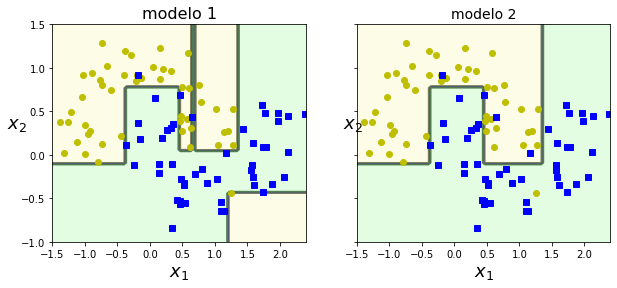

In [ ]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=1)
deep_tree_clf2 = DecisionTreeClassifier(random_state=42, max_depth=7, min_samples_leaf=4)

deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title('modelo 1', fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title('modelo 2', fontsize=14)
plt.show()

Observe as mudanças abaixo.👀

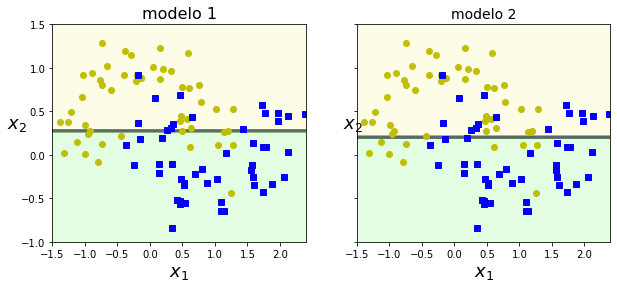

In [ ]:
from sklearn.datasets import make_moons

Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_leaf=50)
deep_tree_clf2 = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_leaf=40)

deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title('modelo 1', fontsize=16)
plt.sca(axes[1])
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.4, -1, 1.5], iris=False)
plt.title('modelo 2', fontsize=14)
plt.show()

# Árvores de regressão

Árvores de decisão também pode ser usadas para problemas de regressão, usando o algoritmo `DecisionTreeRegressor`, como mostrado abaixo.

Um conjunto de pontos baseado em uma curva de grau dois com ruído é gerado, e então é feito um ajuste.

In [ ]:
# conjunto sintético de grau 2

np.random.seed(42)
X = np.random.rand(200, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(200, 1) / 10

In [ ]:
# criação e treinamento de árvore de regressão

from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [ ]:
# exemplo de predição
tree_reg.predict([[1.0]])

array([0.61460379])

O trecho a seguir ilustra as fronteiras de decisão induzidas por árvores de decisão de profundidades diferentes.

In [ ]:
# função auxiliar de plotagem

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel='$y$'):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel('$x_1$', fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, 'b.')
    plt.plot(x1, y_pred, 'r.-', linewidth=2, label='pred')

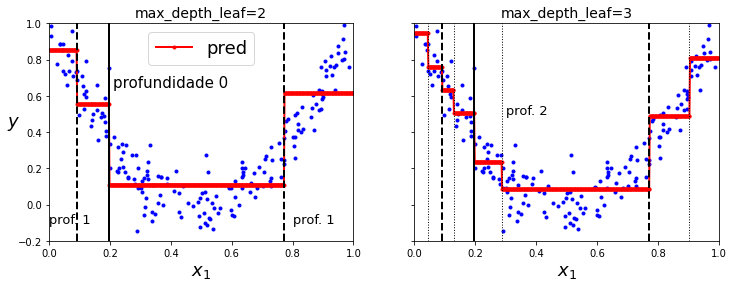

In [ ]:
# dois modelos de exemplo

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# não se preocupe com os detalhes deste código

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, 'profundidade 0', fontsize=15)
plt.text(0.0, -0.1, 'prof. 1', fontsize=13)
plt.text(0.8, -0.1, 'prof. 1', fontsize=13)
plt.legend(loc='upper center', fontsize=18)
plt.title('max_depth_leaf={}'.format(tree_reg1.max_depth), fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], 'k:', linewidth=1)
plt.text(0.3, 0.5, 'prof. 2', fontsize=13)
plt.title('max_depth_leaf={}'.format(tree_reg2.max_depth), fontsize=14)

plt.show()

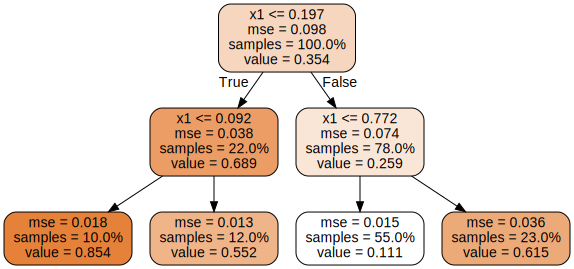

In [ ]:
# visualização da árvore de decisão para o modelo 1

from sklearn.tree import export_graphviz

vis = export_graphviz(tree_reg1, feature_names=['x1'], rounded=True, filled=True, proportion=True)

# exibição da figura
graphviz.Source(vis)

Observe as mudanças abaixo.👀

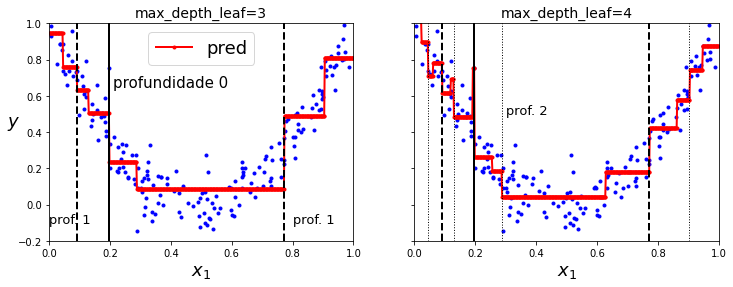

In [ ]:
# dois modelos de exemplo

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=4)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# não se preocupe com os detalhes deste código

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, 'profundidade 0', fontsize=15)
plt.text(0.0, -0.1, 'prof. 1', fontsize=13)
plt.text(0.8, -0.1, 'prof. 1', fontsize=13)
plt.legend(loc='upper center', fontsize=18)
plt.title('max_depth_leaf={}'.format(tree_reg1.max_depth), fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, 'k-'), (0.0917, 'k--'), (0.7718, 'k--')):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], 'k:', linewidth=1)
plt.text(0.3, 0.5, 'prof. 2', fontsize=13)
plt.title('max_depth_leaf={}'.format(tree_reg2.max_depth), fontsize=14)

plt.show()

Note que o critério de divisão para cada nodo é o **mse**, que é simplesmente o quadrado da medida RMSE.

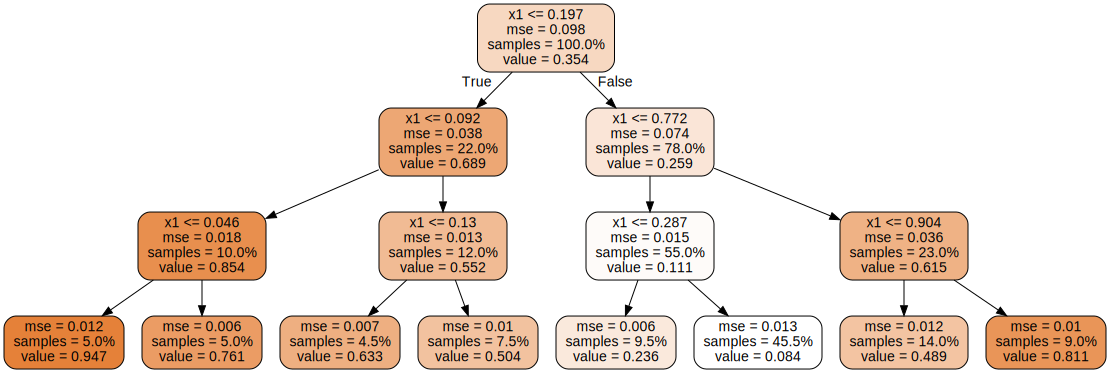

In [ ]:
# visualização da árvore de decisão para o modelo 1(da mudada)

from sklearn.tree import export_graphviz

vis = export_graphviz(tree_reg1, feature_names=['x1'], rounded=True, filled=True, proportion=True)

# exibição da figura
graphviz.Source(vis)

Para este conjunto de dados, se não limitarmos a profundidade da árvore de decisão teremos _overfitting_, que pode ser observado no lado esquerdo da figura abaixo.

Para prevenir isso (sem ter que arbitrar uma profundidade máxima), podemos definir o hiperparâmetro `min_samples_leaf` como um valor maior (o padrão é apenas 1). O resultado é mostrado no lado direito da figura.

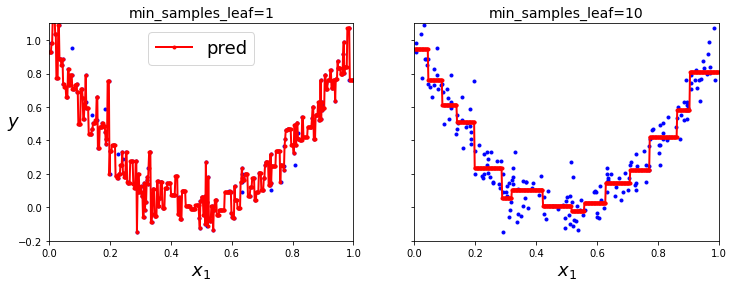

In [ ]:
# dois modelos de exemplo

from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

# não se preocupe com os detalhes deste código

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred1, 'r.-', linewidth=2, label='pred')
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', fontsize=18, rotation=0)
plt.legend(loc='upper center', fontsize=18)
plt.title('min_samples_leaf={}'.format(tree_reg1.min_samples_leaf), fontsize=14)

plt.sca(axes[1])
plt.plot(X, y, 'b.')
plt.plot(x1, y_pred2, 'r.-', linewidth=2, label=r'$\hat{y}$')
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel('$x_1$', fontsize=18)
plt.title('min_samples_leaf={}'.format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()